In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
sys.path.append(base_path)
import deepdoctection as dd
from meri.layout.pipeline_components.utils import CONFIGS_PATH
from meri.transformation.transformer import DocumentTransformer, Format
from meri.layout import LayoutDetector
from matplotlib import pyplot as plt

/root/miniconda3/envs/layout_analysis/lib/python3.12/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[0827 10:33.44 @file_utils.py:36]  INF  PyTorch version 2.3.0 available.


In [2]:
pdf_path = f'{base_path}/demo/data/Alfa Laval LKH.pdf'

### Make detections

In [3]:
pipeline_config_path = os.path.abspath(os.path.join(CONFIGS_PATH, 'custom.yaml'))
detector = LayoutDetector(pipeline_config_path=pipeline_config_path)

dps, page_dicts = detector.detect(pdf_path)

[0827 10:33.47 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/layout/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': ['table', 'figure'],
                   'WEIGHTS': 'layout/d2_model_0829999_layout_inf_only.pt'}}}>


[0827 10:33.50 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0827 10:33.50 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
You are using a model of type table-transformer to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
[0827 10:33.50 @_builder.py:187]  INF  Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)


Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': None,
                   'WEIGHTS': 'microsoft/table-transformer-detection/pytorch_model.bin'}}}>


[0827 10:33.50 @_hub.py:180]  INF  [timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
[0827 10:33.50 @_builder.py:245]  INF  Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
Some weights of the model checkpoint at /root/.cache/deepdoctection/weights/microsoft/table-transformer-detection/pytorch_model.bin were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a Ber

Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': ['table', 'title', 'list', 'text'],
                   'WEIGHTS': 'layout/d2_model_0829999_layout_inf_only.pt'}}}>


[0827 10:33.51 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0827 10:33.51 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0827 10:33.51 @doctectionpipe.py:84]  INF  Processing Alfa Laval LKH_0.pdf


Building pipeline from components:  [<meri.layout.pipeline_components.add_pdf_info_component.AddPDFInfoComponent object at 0x7fe8e9418d10>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7fe8da138cb0>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7fe8d9df7da0>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7fe8da78c6b0>, <meri.layout.pipeline_components.nms_component.NMSComponent object at 0x7fe8d9c54140>, <meri.layout.pipeline_components.ocr_component.OCRComponent object at 0x7fe8daff8080>, <meri.layout.pipeline_components.word_union_component.WordUnionComponent object at 0x7fe8d8e87cb0>]


[0827 10:33.53 @context.py:126]  INF  AddPDFInfoComponent total: 0.2908 sec.
/root/miniconda3/envs/layout_analysis/lib/python3.12/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1712608847532/work/aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[0827 10:34.01 @context.py:126]  INF  LayoutDetectorComponent total: 7.955 sec.
[0827 10:34.01 @context.py:126]  INF  LayoutDetectorComponent total: 0.2756 sec.
[0827 10:34.02 @context.py:126]  INF  LayoutDetectorComponent total: 0.2435 sec.
[0827 10:34.02 @context.py:126]  INF  NMSComponent total: 0.0029 sec.
[0827 10:34.03 @context.py:126]  INF  OCRComponent total: 1.7752 sec.
[0827 10:34.03 @context.py:126]  INF  WordUnionComponent total: 0.0002 sec.
[0827 10:34.04 @doctectionpipe.py:84]  INF  Processing Alfa Laval LKH_1.pdf
[0827

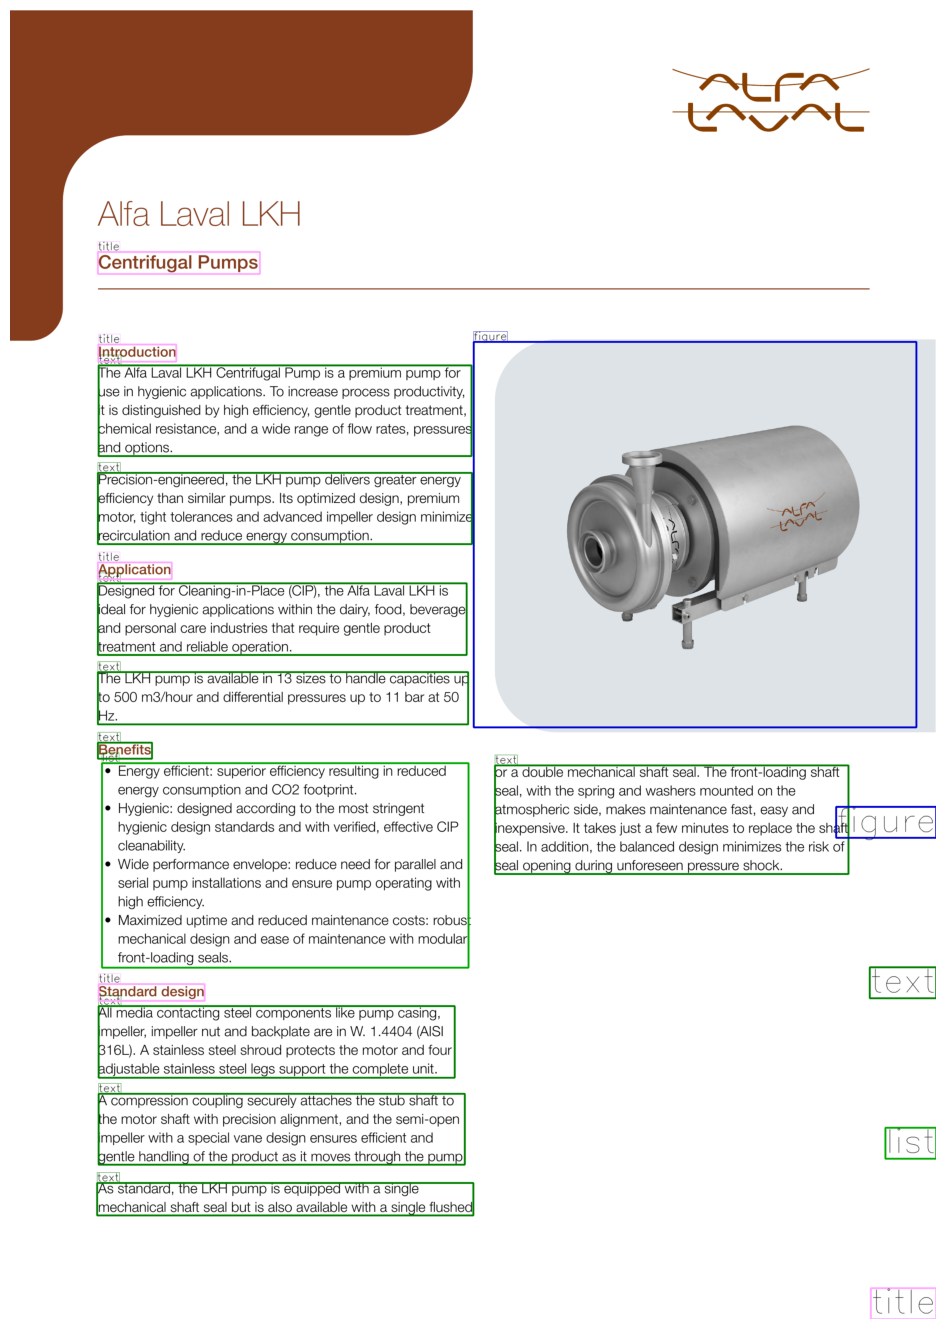

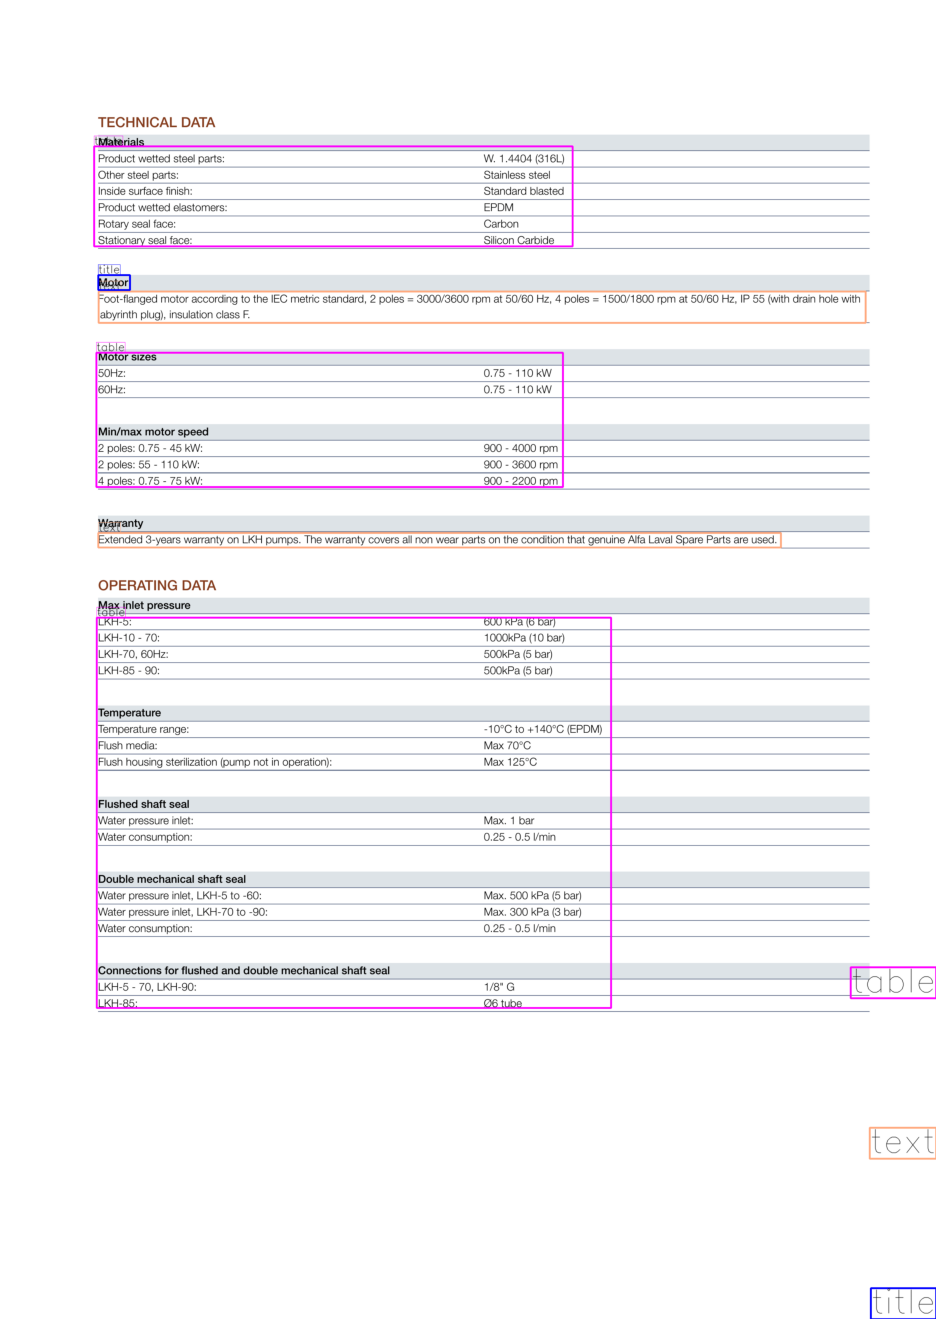

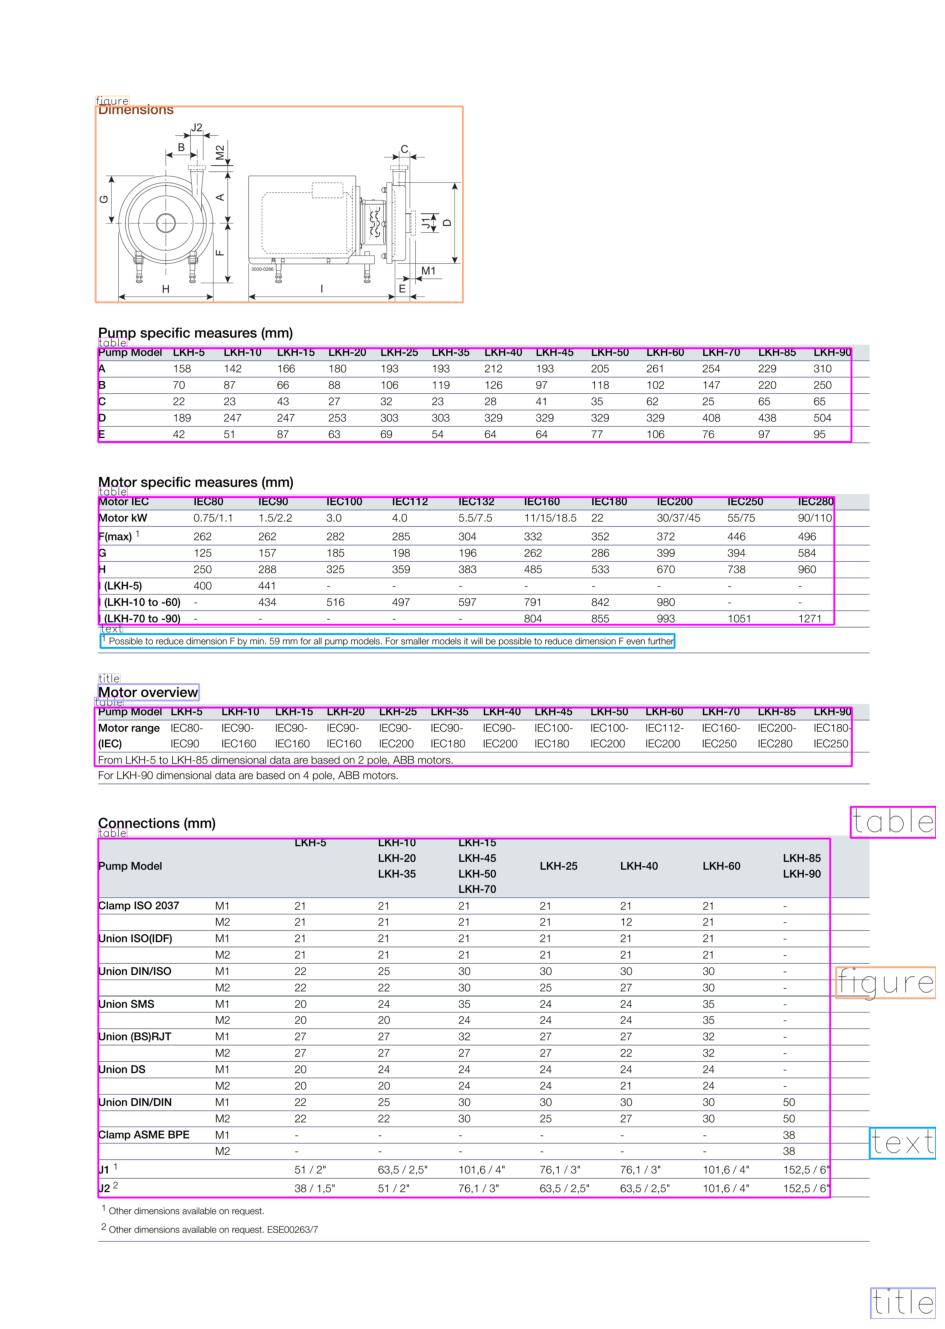

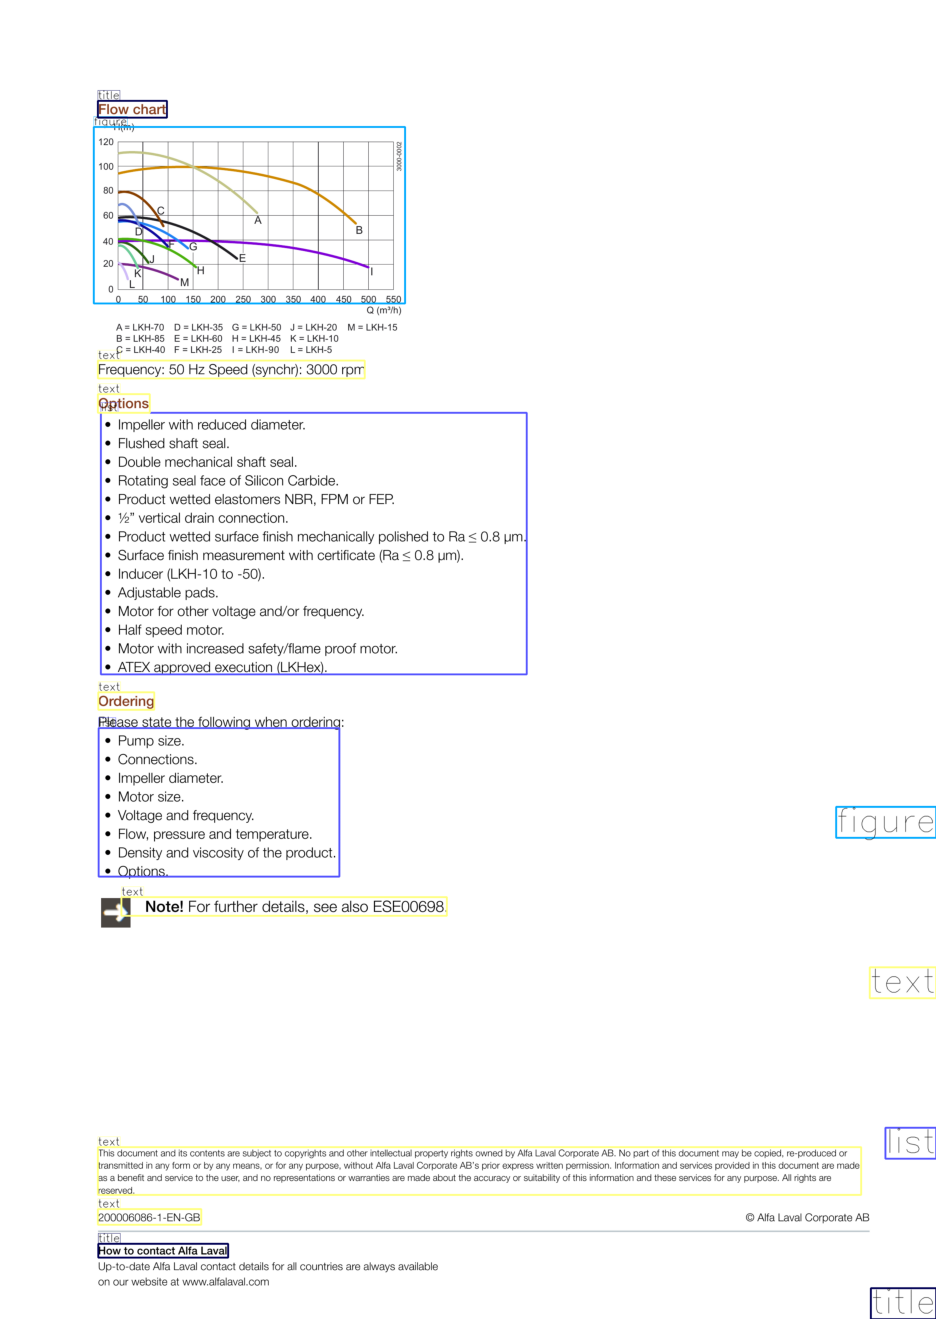

In [4]:
detector.vis()

In [5]:
table_method = 'tatr'
annotations_to_merge = [dd.LayoutType.figure, dd.LayoutType.table]
doc_transformer = DocumentTransformer(pdf_path, table_extraction_method=table_method)
doc_transformer.merge_with_annotations(dps, annotations_to_merge)
doc_transformer.docorate_unmatched_textblocks()

100%|██████████| 4/4 [00:00<00:00, 83.92it/s]


[0827 10:34.21 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


h 1
h 2


[0827 10:34.22 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0827 10:34.22 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
/root/miniconda3/envs/layout_analysis/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at /opt/conda/conda-bld/pytorch_1712608847532/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
[0827 10:34.23 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


cell tokens:  [{'text': 'Rotary seal face:', 'bbox': [1.442291498184204, 53.07166290283203, 53.5323486328125, 61.63300704956055]}, {'text': 'Carbon', 'bbox': [249.57644653320312, 52.72040557861328, 273.74249267578125, 61.44167709350586]}, {'text': 'Product wetted steel parts:', 'bbox': [1.695882797241211, 11.036742210388184, 84.92509460449219, 19.584871292114258]}, {'text': 'W. 1.4404 (316L)', 'bbox': [249.4760284423828, 11.045769691467285, 303.7373046875, 19.7251033782959]}, {'text': 'Inside surface finish:', 'bbox': [1.496716022491455, 32.13470458984375, 63.9349479675293, 40.481483459472656]}, {'text': 'Standard blasted', 'bbox': [249.5870361328125, 32.2822151184082, 302.8511962890625, 40.537628173828125]}, {'text': 'Stainless steel', 'bbox': [249.7598876953125, 21.29864501953125, 294.1479187011719, 30.286331176757812]}, {'text': 'Other steel parts:', 'bbox': [1.6748671531677246, 21.419919967651367, 54.93308639526367, 30.1932315826416]}, {'text': 'Product wetted elastomers:', 'bbox':

[0827 10:34.24 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0827 10:34.24 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
/root/miniconda3/envs/layout_analysis/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at /opt/conda/conda-bld/pytorch_1712608847532/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
[0827 10:34.24 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


cell tokens:  [{'text': '2 poles: 55 - 110 kW:', 'bbox': [0.9725908637046814, 70.40937042236328, 67.8360366821289, 78.40933227539062]}, {'text': '900 - 3600 rpm', 'bbox': [248.92657470703125, 70.3130111694336, 297.97808837890625, 78.23400115966797]}, {'text': '0.75 - 110 kW', 'bbox': [248.73748779296875, 11.063146591186523, 294.177734375, 19.262813568115234]}, {'text': '2 poles: 0.75 - 45 kW:', 'bbox': [0.940766453742981, 59.52118682861328, 69.79365539550781, 68.13955688476562]}, {'text': '900 - 4000 rpm', 'bbox': [248.85153198242188, 59.37879943847656, 297.97698974609375, 68.1856460571289]}, {'text': '50Hz:', 'bbox': [0.9989122748374939, 11.257315635681152, 19.742473602294922, 19.45326805114746]}, {'text': '60Hz:', 'bbox': [1.125058889389038, 21.28998374938965, 19.74784278869629, 30.03470230102539]}, {'text': '0.75 - 110 kW', 'bbox': [248.99168395996094, 21.3851318359375, 294.2851257324219, 30.286048889160156]}, {'text': 'Min/max motor speed', 'bbox': [0.42716872692108154, 48.55907058

[0827 10:34.25 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0827 10:34.25 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0827 10:34.26 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


cell tokens:  [{'text': 'Temperature range:', 'bbox': [0.7743198275566101, 69.95320129394531, 61.07258987426758, 78.5484619140625]}, {'text': 'Max. 500 kPa (5 bar)', 'bbox': [248.0228729248047, 176.9427490234375, 313.5594482421875, 185.29893493652344]}, {'text': 'Max. 1 bar', 'bbox': [248.1353302001953, 128.74676513671875, 282.846435546875, 136.9454345703125]}, {'text': '0.25 - 0.5 l/min', 'bbox': [248.6807098388672, 197.95713806152344, 296.7184753417969, 206.4076690673828]}, {'text': 'Water pressure inlet:', 'bbox': [0.54273521900177, 128.94984436035156, 63.76155471801758, 137.45347595214844]}, {'text': 'Water consumption:', 'bbox': [0.8051224946975708, 198.04116821289062, 62.86452865600586, 206.59896850585938]}, {'text': '500kPa (5 bar)', 'bbox': [248.6165313720703, 22.017436981201172, 294.95819091796875, 30.452600479125977]}, {'text': '1/8" G', 'bbox': [248.5310516357422, 235.83416748046875, 270.6431884765625, 244.49681091308594]}, {'text': 'Water consumption:', 'bbox': [0.715469717

[0827 10:34.27 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0827 10:34.27 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...


cell tokens:  [{'text': '193', 'bbox': [280.9671325683594, 11.597358703613281, 294.6829833984375, 19.01588249206543]}, {'text': '119', 'bbox': [214.0722198486328, 22.210739135742188, 227.7364501953125, 29.194040298461914]}, {'text': '193', 'bbox': [180.919677734375, 11.634687423706055, 194.68310546875, 19.050405502319336]}, {'text': 'Pump Model', 'bbox': [0.4740041494369507, 0.9159302115440369, 42.59311294555664, 9.373411178588867]}, {'text': '253', 'bbox': [147.47666931152344, 43.27497863769531, 160.77890014648438, 50.30830764770508]}, {'text': '193', 'bbox': [213.9619140625, 11.618274688720703, 227.6640625, 19.04107666015625]}, {'text': '41', 'bbox': [280.9125671386719, 32.60789108276367, 290.38031005859375, 39.871002197265625]}, {'text': '142', 'bbox': [80.34839630126953, 11.709977149963379, 93.79568481445312, 19.070890426635742]}, {'text': '106', 'bbox': [181.0837860107422, 22.119672775268555, 194.5061492919922, 29.17751693725586]}, {'text': '166', 'bbox': [114.32083892822266, 11.6

[0827 10:34.30 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


Generated markdown tables: ['<table title="" description=""><tr><td bbox="[56.0, 215.97802734375, 98.0, 224.97802734375]">Pump Model</td><td bbox="[103.0, 215.97802734375, 125.0, 224.97802734375]">LKH-5</td><td bbox="[136.0, 215.97802734375, 162.0, 224.97802734375]">LKH-10</td><td bbox="[170.0, 215.97802734375, 196.0, 224.97802734375]">LKH-15</td><td bbox="[203.0, 215.97802734375, 229.0, 224.97802734375]">LKH-20</td><td bbox="[236.0, 215.97802734375, 263.0, 224.97802734375]">LKH-25</td><td bbox="[269.0, 215.97802734375, 296.0, 224.97802734375]">LKH-35</td><td bbox="[303.0, 215.97802734375, 329.0, 224.97802734375]">LKH-40</td><td bbox="[336.0, 215.97802734375, 363.0, 224.97802734375]">LKH-45</td><td bbox="[372.0, 215.97802734375, 398.0, 224.97802734375]">LKH-50</td><td bbox="[407.0, 215.97802734375, 434.0, 224.97802734375]">LKH-60</td><td bbox="[444.0, 215.97802734375, 470.0, 224.97802734375]">LKH-70</td><td bbox="[479.0, 215.97802734375, 506.0, 224.97802734375]">LKH-85</td><td bbox="[5

[0827 10:34.31 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0827 10:34.31 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
/root/miniconda3/envs/layout_analysis/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at /opt/conda/conda-bld/pytorch_1712608847532/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
[0827 10:34.33 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


cell tokens:  [{'text': '804', 'bbox': [273.1832275390625, 76.45743560791016, 286.94793701171875, 83.74436950683594]}, {'text': '993', 'bbox': [358.4968566894531, 76.39617156982422, 372.35711669921875, 83.67996978759766]}, {'text': '196', 'bbox': [231.4491729736328, 34.20551681518555, 244.7706756591797, 41.594398498535156]}, {'text': '262', 'bbox': [273.27105712890625, 34.2559700012207, 286.8395690917969, 41.38252258300781]}, {'text': '855', 'bbox': [316.3996276855469, 76.44850158691406, 330.3094482421875, 83.64319610595703]}, {'text': 'I (LKH-5)', 'bbox': [0.1734522432088852, 55.09521484375, 29.74344825744629, 63.53413772583008]}, {'text': '198', 'bbox': [188.4956512451172, 34.23474884033203, 201.85232543945312, 41.540775299072266]}, {'text': '185', 'bbox': [146.4744110107422, 34.26482009887695, 159.7681121826172, 41.61732864379883]}, {'text': 'IEC90', 'bbox': [102.56243133544922, 0.7063773274421692, 123.80877685546875, 9.6812105178833]}, {'text': '960', 'bbox': [449.8335266113281, 44

[0827 10:34.33 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0827 10:34.33 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0827 10:34.35 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


cell tokens:  [{'text': 'LKH-5', 'bbox': [48.206146240234375, 0.9216960668563843, 70.67731475830078, 9.625696182250977]}, {'text': 'Pump Model', 'bbox': [1.8132710456848145, 0.9815980195999146, 44.580413818359375, 9.898317337036133]}, {'text': 'LKH-35', 'bbox': [215.65264892578125, 0.9059221744537354, 241.69802856445312, 9.604923248291016]}, {'text': 'LKH-40', 'bbox': [249.23641967773438, 0.9988470077514648, 275.4306640625, 9.44027328491211]}, {'text': 'LKH-45', 'bbox': [282.183349609375, 0.95291668176651, 308.3125, 9.619006156921387]}, {'text': 'LKH-25', 'bbox': [182.24913024902344, 0.8817054033279419, 208.29879760742188, 9.645764350891113]}, {'text': 'LKH-50', 'bbox': [318.3392028808594, 1.0273709297180176, 344.54742431640625, 9.522628784179688]}, {'text': 'LKH-10', 'bbox': [80.91146087646484, 1.0001096725463867, 106.97770690917969, 9.53099250793457]}, {'text': 'LKH-20', 'bbox': [148.752197265625, 0.9284188747406006, 174.90159606933594, 9.50749683380127]}, {'text': 'LKH-60', 'bbox': 

[0827 10:34.36 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0827 10:34.36 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...


cell tokens:  [{'text': 'Union SMS', 'bbox': [0.35157495737075806, 105.00079345703125, 37.58553695678711, 113.704345703125]}, {'text': '101,6 / 4"', 'bbox': [230.69725036621094, 211.48377990722656, 262.7676086425781, 219.6612091064453]}, {'text': '101,6 / 4"', 'bbox': [387.9648742675781, 211.6267547607422, 419.83917236328125, 219.58985900878906]}, {'text': 'Union DS', 'bbox': [0.2906660735607147, 147.1725616455078, 31.801795959472656, 155.62191772460938]}, {'text': '51 / 2"', 'bbox': [179.43661499023438, 223.20217895507812, 201.7530975341797, 231.64219665527344]}, {'text': '24', 'bbox': [335.1566467285156, 115.67279052734375, 344.69317626953125, 123.54322814941406]}, {'text': '35', 'bbox': [388.1813049316406, 105.17925262451172, 397.7146301269531, 112.61068725585938]}, {'text': '21', 'bbox': [388.2184143066406, 41.51239776611328, 397.65460205078125, 49.65595245361328]}, {'text': 'M1', 'bbox': [74.37672424316406, 189.170166015625, 85.92240905761719, 196.93272399902344]}, {'text': '21', 

/root/miniconda3/envs/layout_analysis/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at /opt/conda/conda-bld/pytorch_1712608847532/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Generated markdown tables: ['<table title="" description=""><tr><td bbox="[56.0, 572.3944702148438, 116.0, 581.3944702148438]">Clamp ISO 2037</td><td bbox="[130.0, 572.3944702148438, 142.0, 581.3944702148438]">M1</td><td bbox="[181.0, 572.3944702148438, 209.0, 581.3944702148438]">21</td><td bbox="[235.0, 572.3944702148438, 269.0, 581.3944702148438]">21</td><td bbox="[286.0, 572.3944702148438, 318.0, 581.3944702148438]">21</td><td bbox="[339.0, 572.3944702148438, 373.0, 581.3944702148438]">21</td><td bbox="[391.0, 572.3944702148438, 424.0, 581.3944702148438]">21</td><td bbox="[444.0, 572.3944702148438, 476.0, 581.3944702148438]">21</td><td bbox="[496.0, 572.3944702148438, 527.0, 581.3944702148438]"></td></tr><tr><td bbox="[56.0, 582.3944702148438, 116.0, 590.3944702148438]"></td><td bbox="[130.0, 582.3944702148438, 142.0, 590.3944702148438]">M2</td><td bbox="[181.0, 582.3944702148438, 209.0, 590.3944702148438]">21</td><td bbox="[235.0, 582.3944702148438, 269.0, 590.3944702148438]">21</t

<h1 bbox="[56.69292068481445, 118.453125, 187.65892028808594, 143.62112426757812]" page_index="0" className="text_wrapper"> Alfa Laval LKH
 </h1>

<h2 bbox="[56.690940856933594, 155.0020751953125, 159.60293579101562, 169.07806396484375]" page_index="0" className="text_wrapper"> Centrifugal Pumps
 </h2>

<div bbox="[56.69292068481445, 214.4307098388672, 109.54092407226562, 224.98770141601562]" page_index="0" className="text_wrapper">Introduction 
 </div>

<div bbox="[56.69292068481445, 227.87669372558594, 297.10992431640625, 286.5057067871094]" page_index="0" className="text_wrapper">The Alfa Laval LKH Centrifugal Pump is a premium pump for
use in hygienic applications. To increase process productivity,
it is distinguished by high efficiency, gentle product treatment,
chemical resistance, and a wide range of flow rates, pressures
and options.
 </div>

<div bbox="[56.69292068481445, 296.380615234375, 297.577880859375, 343.0096130371094]" page_index="0" className="text_wrapper">Precision-engineered, the LKH pump delivers greater energy
efficiency than similar pumps. Its optimized design, premium
motor, tight tolerances and advanced impeller design minimize
recirculation and reduce energy consumption.
 </div>

<div bbox="[56.69293975830078, 354.4385986328125, 106.21094512939453, 364.99560546875]" page_index="0" className="text_wrapper">Application 
 </div>

<div bbox="[56.69293975830078, 367.88458251953125, 292.9339904785156, 414.5135192871094]" page_index="0" className="text_wrapper">Designed for Cleaning-in-Place (CIP), the Alfa Laval LKH is
ideal for hygienic applications within the dairy, food, beverage
and personal care industries that require gentle product
treatment and reliable operation.
 </div>

<div bbox="[56.69293975830078, 424.388427734375, 295.408935546875, 459.0174255371094]" page_index="0" className="text_wrapper">The LKH pump is available in 13 sizes to handle capacities up
to 500 m3/hour and differential pressures up to 11 bar at 50
Hz.
 </div>

<div bbox="[56.69293975830078, 470.4463195800781, 93.37693786621094, 481.0033264160156]" page_index="0" className="text_wrapper">Benefits 
 </div>

<div bbox="[60.697940826416016, 483.8923034667969, 296.65093994140625, 614.5213623046875]" page_index="0" className="text_wrapper">• Energy efficient: superior efficiency resulting in reduced
energy consumption and CO2 footprint.
• Hygienic: designed according to the most stringent
hygienic design standards and with verified, effective CIP
cleanability.
• Wide performance envelope: reduce need for parallel and
serial pump installations and ensure pump operating with
high efficiency.
• Maximized uptime and reduced maintenance costs: robust
mechanical design and ease of maintenance with modular
front-loading seals.
 </div>

<div bbox="[56.69300079345703, 625.9502563476562, 127.55000305175781, 636.5072631835938]" page_index="0" className="text_wrapper">Standard design 
 </div>

<div bbox="[56.69300079345703, 639.396240234375, 284.07806396484375, 686.0252685546875]" page_index="0" className="text_wrapper">All media contacting steel components like pump casing,
impeller, impeller nut and backplate are in W. 1.4404 (AISI
316L). A stainless steel shroud protects the motor and four
adjustable stainless steel legs support the complete unit.
 </div>

<div bbox="[56.69301986694336, 695.900146484375, 293.7440490722656, 742.5292358398438]" page_index="0" className="text_wrapper">A compression coupling securely attaches the stub shaft to
the motor shaft with precision alignment, and the semi-open
impeller with a special vane design ensures efficient and
gentle handling of the product as it moves through the pump.
 </div>

<div bbox="[56.69301986694336, 752.4041748046875, 297.5599670410156, 775.0332641601562]" page_index="0" className="text_wrapper">As standard, the LKH pump is equipped with a single
mechanical shaft seal but is also available with a single flushed
 </div>

<div bbox="[311.81121826171875, 484.666259765625, 539.0072021484375, 555.2952880859375]" page_index="0" className="text_wrapper">or a double mechanical shaft seal. The front-loading shaft
seal, with the spring and washers mounted on the
atmospheric side, makes maintenance fast, easy and
inexpensive. It takes just a few minutes to replace the shaft
seal. In addition, the balanced design minimizes the risk of
seal opening during unforeseen pressure shock.
 </div>

<div bbox="[298, 213, 582, 461]" page_index="0" className="image_wrapper"> 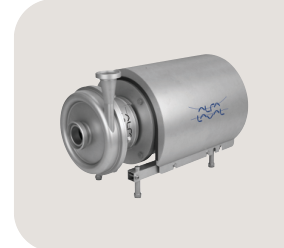 </div>

<div bbox="[56.69292068481445, 67.02910614013672, 134.55191040039062, 77.58610534667969]" page_index="1" className="text_wrapper">TECHNICAL DATA 
 </div>

<div bbox="[54, 87, 361, 151]" page_index="1" className="table_wrapper"><table title="" description=""><tr><td bbox="[55.0, 91.78861999511719, 140.0, 99.78861999511719]">Product wetted steel parts:</td><td bbox="[303.0, 91.78861999511719, 357.0, 99.78861999511719]">W. 1.4404 (316L)</td></tr><tr><td bbox="[55.0, 101.78861999511719, 140.0, 110.78861999511719]">Other steel parts:</td><td bbox="[303.0, 101.78861999511719, 357.0, 110.78861999511719]">Stainless steel</td></tr><tr><td bbox="[55.0, 112.78861999511719, 140.0, 120.78861999511719]">Inside surface finish:</td><td bbox="[303.0, 112.78861999511719, 357.0, 120.78861999511719]">Standard blasted</td></tr><tr><td bbox="[55.0, 122.78861999511719, 140.0, 131.7886199951172]">Product wetted elastomers:</td><td bbox="[303.0, 122.78861999511719, 357.0, 131.7886199951172]">EPDM</td></tr><tr><td bbox="[55.0, 132.7886199951172, 140.0, 141.7886199951172]">Rotary seal face:</td><td bbox="[303.0, 132.7886199951172, 357.0, 141.7886199951172]">Carbon</td></tr><tr><td bbox="[55.0, 143.7886199951172, 140.0, 151.7886199951172]">Stationary seal face:</td><td bbox="[303.0, 143.7886199951172, 357.0, 151.7886199951172]">Silicon Carbide</td></tr></table></div>

<div bbox="[56.69293212890625, 171.04649353027344, 549.9204711914062, 179.2574920654297]" page_index="1" className="text_wrapper">Motor
 
 </div>

<div bbox="[56.69293212890625, 181.50450134277344, 546.9801635742188, 199.77149963378906]" page_index="1" className="text_wrapper">Foot-flanged motor according to the IEC metric standard, 2 poles = 3000/3600 rpm at 50/60 Hz, 4 poles = 1500/1800 rpm at 50/60 Hz, IP 55 (with drain hole with
labyrinth plug), insulation class F.
 </div>

<div bbox="[55, 220, 355, 306]" page_index="1" className="table_wrapper"><table title="" description=""><tr><td bbox="[55.0, 218.8043670654297, 128.0, 226.8043670654297]">Motor sizes</td><td bbox="[303.0, 218.8043670654297, 353.0, 226.8043670654297]"></td></tr><tr><td bbox="[55.0, 229.8043670654297, 128.0, 237.8043670654297]">50Hz:</td><td bbox="[303.0, 229.8043670654297, 353.0, 237.8043670654297]">0.75 - 110 kW</td></tr><tr><td bbox="[55.0, 239.8043670654297, 128.0, 248.8043670654297]">60Hz:</td><td bbox="[303.0, 239.8043670654297, 353.0, 248.8043670654297]">0.75 - 110 kW</td></tr><tr><td bbox="[55.0, 266.8043670654297, 128.0, 274.8043670654297]">Min/max motor speed</td><td bbox="[303.0, 266.8043670654297, 353.0, 274.8043670654297]"></td></tr><tr><td bbox="[55.0, 277.8043670654297, 128.0, 286.8043670654297]">2 poles: 0.75 - 45 kW:</td><td bbox="[303.0, 277.8043670654297, 353.0, 286.8043670654297]">900 - 4000 rpm</td></tr><tr><td bbox="[55.0, 288.8043670654297, 128.0, 296.8043670654297]">2 poles: 55 - 110 kW:</td><td bbox="[303.0, 288.8043670654297, 353.0, 296.8043670654297]">900 - 3600 rpm</td></tr><tr><td bbox="[55.0, 298.8043670654297, 128.0, 305.8043670654297]">4 poles: 0.75 - 75 kW:</td><td bbox="[303.0, 298.8043670654297, 353.0, 305.8043670654297]">900 - 2200 rpm</td></tr></table></div>

<div bbox="[56.69293212890625, 325.8200988769531, 549.9204711914062, 334.0310974121094]" page_index="1" className="text_wrapper">Warranty
 
 </div>

<div bbox="[56.69293212890625, 336.2781066894531, 493.42303466796875, 344.54510498046875]" page_index="1" className="text_wrapper">Extended 3-years warranty on LKH pumps. The warranty covers all non wear parts on the condition that genuine Alfa Laval Spare Parts are used.
 </div>

<div bbox="[56.69293212890625, 364.8184814453125, 135.0739288330078, 375.37548828125]" page_index="1" className="text_wrapper">OPERATING DATA 
 </div>

<div bbox="[56.69293212890625, 378.5779724121094, 306.67047119140625, 386.7889709472656]" page_index="1" className="text_wrapper">Max inlet pressure
 
 </div>

<div bbox="[55, 390, 386, 641]" page_index="1" className="table_wrapper"><table title="" description=""><tr><td bbox="[55.0, 389.0359802246094, 244.0, 398.0359802246094]">LKH-5:</td><td bbox="[303.0, 389.0359802246094, 381.0, 398.0359802246094]">600 kPa (6 bar)</td></tr><tr><td bbox="[55.0, 400.0359802246094, 244.0, 409.0359802246094]">LKH-10 - 70:</td><td bbox="[303.0, 400.0359802246094, 381.0, 409.0359802246094]">1000kPa (10 bar)</td></tr><tr><td bbox="[55.0, 410.0359802246094, 244.0, 419.0359802246094]">LKH-70, 60Hz:</td><td bbox="[303.0, 410.0359802246094, 381.0, 419.0359802246094]">500kPa (5 bar)</td></tr><tr><td bbox="[55.0, 421.0359802246094, 244.0, 430.0359802246094]">LKH-85 - 90:</td><td bbox="[303.0, 421.0359802246094, 381.0, 430.0359802246094]">500kPa (5 bar)</td></tr><tr><td bbox="[55.0, 448.0359802246094, 244.0, 456.0359802246094]">Temperature</td><td bbox="[303.0, 448.0359802246094, 381.0, 456.0359802246094]"></td></tr><tr><td bbox="[55.0, 458.0359802246094, 244.0, 467.0359802246094]">Temperature range:</td><td bbox="[303.0, 458.0359802246094, 381.0, 467.0359802246094]">-10°C to +140°C (EPDM)</td></tr><tr><td bbox="[55.0, 468.0359802246094, 244.0, 478.0359802246094]">Flush media:</td><td bbox="[303.0, 468.0359802246094, 381.0, 478.0359802246094]">Max 70°C</td></tr><tr><td bbox="[55.0, 479.0359802246094, 244.0, 488.0359802246094]">Flush housing sterilization (pump not in operation):</td><td bbox="[303.0, 479.0359802246094, 381.0, 488.0359802246094]">Max 125°C</td></tr><tr><td bbox="[55.0, 507.0359802246094, 244.0, 515.0359802246094]">Flushed shaft seal</td><td bbox="[303.0, 507.0359802246094, 381.0, 515.0359802246094]"></td></tr><tr><td bbox="[55.0, 517.0359802246094, 244.0, 526.0359802246094]">Water pressure inlet:</td><td bbox="[303.0, 517.0359802246094, 381.0, 526.0359802246094]">Max. 1 bar</td></tr><tr><td bbox="[55.0, 528.0359802246094, 244.0, 537.0359802246094]">Water consumption:</td><td bbox="[303.0, 528.0359802246094, 381.0, 537.0359802246094]">0.25 - 0.5 l/min</td></tr><tr><td bbox="[55.0, 555.0359802246094, 244.0, 563.0359802246094]">Double mechanical shaft seal</td><td bbox="[303.0, 555.0359802246094, 381.0, 563.0359802246094]"></td></tr><tr><td bbox="[55.0, 565.0359802246094, 244.0, 574.0359802246094]">Water pressure inlet, LKH-5 to -60:</td><td bbox="[303.0, 565.0359802246094, 381.0, 574.0359802246094]">Max. 500 kPa (5 bar)</td></tr><tr><td bbox="[55.0, 576.0359802246094, 244.0, 585.0359802246094]">Water pressure inlet, LKH-70 to -90:</td><td bbox="[303.0, 576.0359802246094, 381.0, 585.0359802246094]">Max. 300 kPa (3 bar)</td></tr><tr><td bbox="[55.0, 586.0359802246094, 244.0, 595.0359802246094]">Water consumption:</td><td bbox="[303.0, 586.0359802246094, 381.0, 595.0359802246094]">0.25 - 0.5 l/min</td></tr><tr><td bbox="[55.0, 614.0359802246094, 244.0, 621.0359802246094]">Connections for flushed and double mechanical shaft seal</td><td bbox="[303.0, 614.0359802246094, 381.0, 621.0359802246094]"></td></tr><tr><td bbox="[55.0, 624.0359802246094, 244.0, 633.0359802246094]">LKH-5 - 70, LKH-90:</td><td bbox="[303.0, 624.0359802246094, 381.0, 633.0359802246094]">1/8" G</td></tr><tr><td bbox="[55.0, 635.0359802246094, 244.0, 642.0359802246094]">LKH-85:</td><td bbox="[303.0, 635.0359802246094, 381.0, 642.0359802246094]">Ø6 tube</td></tr></table></div>

<div bbox="[54, 61, 291, 188]" page_index="2" className="image_wrapper"> 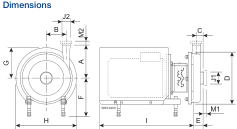 </div>

<div bbox="[56.69292068481445, 202.218505859375, 182.07191467285156, 212.77549743652344]" page_index="2" className="text_wrapper">Pump specific measures (mm)
 </div>

<div bbox="[56, 217, 540, 277]" page_index="2" className="table_wrapper"><table title="" description=""><tr><td bbox="[56.0, 215.97802734375, 98.0, 224.97802734375]">Pump Model</td><td bbox="[103.0, 215.97802734375, 125.0, 224.97802734375]">LKH-5</td><td bbox="[136.0, 215.97802734375, 162.0, 224.97802734375]">LKH-10</td><td bbox="[170.0, 215.97802734375, 196.0, 224.97802734375]">LKH-15</td><td bbox="[203.0, 215.97802734375, 229.0, 224.97802734375]">LKH-20</td><td bbox="[236.0, 215.97802734375, 263.0, 224.97802734375]">LKH-25</td><td bbox="[269.0, 215.97802734375, 296.0, 224.97802734375]">LKH-35</td><td bbox="[303.0, 215.97802734375, 329.0, 224.97802734375]">LKH-40</td><td bbox="[336.0, 215.97802734375, 363.0, 224.97802734375]">LKH-45</td><td bbox="[372.0, 215.97802734375, 398.0, 224.97802734375]">LKH-50</td><td bbox="[407.0, 215.97802734375, 434.0, 224.97802734375]">LKH-60</td><td bbox="[444.0, 215.97802734375, 470.0, 224.97802734375]">LKH-70</td><td bbox="[479.0, 215.97802734375, 506.0, 224.97802734375]">LKH-85</td><td bbox="[515.0, 215.97802734375, 541.0, 224.97802734375]">LKH-90</td></tr><tr><td bbox="[56.0, 226.97802734375, 98.0, 234.97802734375]">A</td><td bbox="[103.0, 226.97802734375, 125.0, 234.97802734375]">158</td><td bbox="[136.0, 226.97802734375, 162.0, 234.97802734375]">142</td><td bbox="[170.0, 226.97802734375, 196.0, 234.97802734375]">166</td><td bbox="[203.0, 226.97802734375, 229.0, 234.97802734375]">180</td><td bbox="[236.0, 226.97802734375, 263.0, 234.97802734375]">193</td><td bbox="[269.0, 226.97802734375, 296.0, 234.97802734375]">193</td><td bbox="[303.0, 226.97802734375, 329.0, 234.97802734375]">212</td><td bbox="[336.0, 226.97802734375, 363.0, 234.97802734375]">193</td><td bbox="[372.0, 226.97802734375, 398.0, 234.97802734375]">205</td><td bbox="[407.0, 226.97802734375, 434.0, 234.97802734375]">261</td><td bbox="[444.0, 226.97802734375, 470.0, 234.97802734375]">254</td><td bbox="[479.0, 226.97802734375, 506.0, 234.97802734375]">229</td><td bbox="[515.0, 226.97802734375, 541.0, 234.97802734375]">310</td></tr><tr><td bbox="[56.0, 237.97802734375, 98.0, 244.97802734375]">B</td><td bbox="[103.0, 237.97802734375, 125.0, 244.97802734375]">70</td><td bbox="[136.0, 237.97802734375, 162.0, 244.97802734375]">87</td><td bbox="[170.0, 237.97802734375, 196.0, 244.97802734375]">66</td><td bbox="[203.0, 237.97802734375, 229.0, 244.97802734375]">88</td><td bbox="[236.0, 237.97802734375, 263.0, 244.97802734375]">106</td><td bbox="[269.0, 237.97802734375, 296.0, 244.97802734375]">119</td><td bbox="[303.0, 237.97802734375, 329.0, 244.97802734375]">126</td><td bbox="[336.0, 237.97802734375, 363.0, 244.97802734375]">97</td><td bbox="[372.0, 237.97802734375, 398.0, 244.97802734375]">118</td><td bbox="[407.0, 237.97802734375, 434.0, 244.97802734375]">102</td><td bbox="[444.0, 237.97802734375, 470.0, 244.97802734375]">147</td><td bbox="[479.0, 237.97802734375, 506.0, 244.97802734375]">220</td><td bbox="[515.0, 237.97802734375, 541.0, 244.97802734375]">250</td></tr><tr><td bbox="[56.0, 247.97802734375, 98.0, 255.97802734375]">C</td><td bbox="[103.0, 247.97802734375, 125.0, 255.97802734375]">22</td><td bbox="[136.0, 247.97802734375, 162.0, 255.97802734375]">23</td><td bbox="[170.0, 247.97802734375, 196.0, 255.97802734375]">43</td><td bbox="[203.0, 247.97802734375, 229.0, 255.97802734375]">27</td><td bbox="[236.0, 247.97802734375, 263.0, 255.97802734375]">32</td><td bbox="[269.0, 247.97802734375, 296.0, 255.97802734375]">23</td><td bbox="[303.0, 247.97802734375, 329.0, 255.97802734375]">28</td><td bbox="[336.0, 247.97802734375, 363.0, 255.97802734375]">41</td><td bbox="[372.0, 247.97802734375, 398.0, 255.97802734375]">35</td><td bbox="[407.0, 247.97802734375, 434.0, 255.97802734375]">62</td><td bbox="[444.0, 247.97802734375, 470.0, 255.97802734375]">25</td><td bbox="[479.0, 247.97802734375, 506.0, 255.97802734375]">65</td><td bbox="[515.0, 247.97802734375, 541.0, 255.97802734375]">65</td></tr><tr><td bbox="[56.0, 258.97802734375, 98.0, 266.97802734375]">D</td><td bbox="[103.0, 258.97802734375, 125.0, 266.97802734375]">189</td><td bbox="[136.0, 258.97802734375, 162.0, 266.97802734375]">247</td><td bbox="[170.0, 258.97802734375, 196.0, 266.97802734375]">247</td><td bbox="[203.0, 258.97802734375, 229.0, 266.97802734375]">253</td><td bbox="[236.0, 258.97802734375, 263.0, 266.97802734375]">303</td><td bbox="[269.0, 258.97802734375, 296.0, 266.97802734375]">303</td><td bbox="[303.0, 258.97802734375, 329.0, 266.97802734375]">329</td><td bbox="[336.0, 258.97802734375, 363.0, 266.97802734375]">329</td><td bbox="[372.0, 258.97802734375, 398.0, 266.97802734375]">329</td><td bbox="[407.0, 258.97802734375, 434.0, 266.97802734375]">329</td><td bbox="[444.0, 258.97802734375, 470.0, 266.97802734375]">408</td><td bbox="[479.0, 258.97802734375, 506.0, 266.97802734375]">438</td><td bbox="[515.0, 258.97802734375, 541.0, 266.97802734375]">504</td></tr><tr><td bbox="[56.0, 268.97802734375, 98.0, 276.97802734375]"></td><td bbox="[103.0, 268.97802734375, 125.0, 276.97802734375]">42</td><td bbox="[136.0, 268.97802734375, 162.0, 276.97802734375]">51</td><td bbox="[170.0, 268.97802734375, 196.0, 276.97802734375]">87</td><td bbox="[203.0, 268.97802734375, 229.0, 276.97802734375]">63</td><td bbox="[236.0, 268.97802734375, 263.0, 276.97802734375]">69</td><td bbox="[269.0, 268.97802734375, 296.0, 276.97802734375]">54</td><td bbox="[303.0, 268.97802734375, 329.0, 276.97802734375]">64</td><td bbox="[336.0, 268.97802734375, 363.0, 276.97802734375]">64</td><td bbox="[372.0, 268.97802734375, 398.0, 276.97802734375]">77</td><td bbox="[407.0, 268.97802734375, 434.0, 276.97802734375]">106</td><td bbox="[444.0, 268.97802734375, 470.0, 276.97802734375]">76</td><td bbox="[479.0, 268.97802734375, 506.0, 276.97802734375]">97</td><td bbox="[515.0, 268.97802734375, 541.0, 276.97802734375]">95</td></tr></table></div>

<div bbox="[56.69293212890625, 298.2214050292969, 182.41392517089844, 308.7784118652344]" page_index="2" className="text_wrapper">Motor specific measures (mm)
 </div>

<div bbox="[56, 313, 529, 395]" page_index="2" className="table_wrapper"><table title="" description=""><tr><td bbox="[56.0, 311.98089599609375, 110.0, 320.98089599609375]">Motor IEC</td><td bbox="[116.0, 311.98089599609375, 144.0, 320.98089599609375]">IEC80</td><td bbox="[158.0, 311.98089599609375, 182.0, 320.98089599609375]">IEC90</td><td bbox="[202.0, 311.98089599609375, 227.0, 320.98089599609375]">IEC100</td><td bbox="[244.0, 311.98089599609375, 269.0, 320.98089599609375]">IEC112</td><td bbox="[286.0, 311.98089599609375, 312.0, 320.98089599609375]">IEC132</td><td bbox="[329.0, 311.98089599609375, 364.0, 320.98089599609375]">IEC160</td><td bbox="[372.0, 311.98089599609375, 397.0, 320.98089599609375]">IEC180</td><td bbox="[414.0, 311.98089599609375, 444.0, 320.98089599609375]">IEC200</td><td bbox="[460.0, 311.98089599609375, 484.0, 320.98089599609375]">IEC250</td><td bbox="[505.0, 311.98089599609375, 529.0, 320.98089599609375]">IEC280</td></tr><tr><td bbox="[56.0, 322.98089599609375, 110.0, 330.98089599609375]">Motor kW</td><td bbox="[116.0, 322.98089599609375, 144.0, 330.98089599609375]">0.75/1.1</td><td bbox="[158.0, 322.98089599609375, 182.0, 330.98089599609375]">1.5/2.2</td><td bbox="[202.0, 322.98089599609375, 227.0, 330.98089599609375]">3.0</td><td bbox="[244.0, 322.98089599609375, 269.0, 330.98089599609375]">4.0</td><td bbox="[286.0, 322.98089599609375, 312.0, 330.98089599609375]">5.5/7.5</td><td bbox="[329.0, 322.98089599609375, 364.0, 330.98089599609375]">11/15/18.5</td><td bbox="[372.0, 322.98089599609375, 397.0, 330.98089599609375]">22</td><td bbox="[414.0, 322.98089599609375, 444.0, 330.98089599609375]">30/37/45</td><td bbox="[460.0, 322.98089599609375, 484.0, 330.98089599609375]">55/75</td><td bbox="[505.0, 322.98089599609375, 529.0, 330.98089599609375]">90/110</td></tr><tr><td bbox="[56.0, 332.98089599609375, 110.0, 342.98089599609375]">F(max) 1</td><td bbox="[116.0, 332.98089599609375, 144.0, 342.98089599609375]">262</td><td bbox="[158.0, 332.98089599609375, 182.0, 342.98089599609375]">262</td><td bbox="[202.0, 332.98089599609375, 227.0, 342.98089599609375]">282</td><td bbox="[244.0, 332.98089599609375, 269.0, 342.98089599609375]">285</td><td bbox="[286.0, 332.98089599609375, 312.0, 342.98089599609375]">304</td><td bbox="[329.0, 332.98089599609375, 364.0, 342.98089599609375]">332</td><td bbox="[372.0, 332.98089599609375, 397.0, 342.98089599609375]">352</td><td bbox="[414.0, 332.98089599609375, 444.0, 342.98089599609375]">372</td><td bbox="[460.0, 332.98089599609375, 484.0, 342.98089599609375]">446</td><td bbox="[505.0, 332.98089599609375, 529.0, 342.98089599609375]">496</td></tr><tr><td bbox="[56.0, 344.98089599609375, 110.0, 353.98089599609375]">G</td><td bbox="[116.0, 344.98089599609375, 144.0, 353.98089599609375]">125</td><td bbox="[158.0, 344.98089599609375, 182.0, 353.98089599609375]">157</td><td bbox="[202.0, 344.98089599609375, 227.0, 353.98089599609375]">185</td><td bbox="[244.0, 344.98089599609375, 269.0, 353.98089599609375]">198</td><td bbox="[286.0, 344.98089599609375, 312.0, 353.98089599609375]">196</td><td bbox="[329.0, 344.98089599609375, 364.0, 353.98089599609375]">262</td><td bbox="[372.0, 344.98089599609375, 397.0, 353.98089599609375]">286</td><td bbox="[414.0, 344.98089599609375, 444.0, 353.98089599609375]">399</td><td bbox="[460.0, 344.98089599609375, 484.0, 353.98089599609375]">394</td><td bbox="[505.0, 344.98089599609375, 529.0, 353.98089599609375]">584</td></tr><tr><td bbox="[56.0, 355.98089599609375, 110.0, 364.98089599609375]">H</td><td bbox="[116.0, 355.98089599609375, 144.0, 364.98089599609375]">250</td><td bbox="[158.0, 355.98089599609375, 182.0, 364.98089599609375]">288</td><td bbox="[202.0, 355.98089599609375, 227.0, 364.98089599609375]">325</td><td bbox="[244.0, 355.98089599609375, 269.0, 364.98089599609375]">359</td><td bbox="[286.0, 355.98089599609375, 312.0, 364.98089599609375]">383</td><td bbox="[329.0, 355.98089599609375, 364.0, 364.98089599609375]">485</td><td bbox="[372.0, 355.98089599609375, 397.0, 364.98089599609375]">533</td><td bbox="[414.0, 355.98089599609375, 444.0, 364.98089599609375]">670</td><td bbox="[460.0, 355.98089599609375, 484.0, 364.98089599609375]">738</td><td bbox="[505.0, 355.98089599609375, 529.0, 364.98089599609375]">960</td></tr><tr><td bbox="[56.0, 365.98089599609375, 110.0, 374.98089599609375]">I (LKH-5)</td><td bbox="[116.0, 365.98089599609375, 144.0, 374.98089599609375]">400</td><td bbox="[158.0, 365.98089599609375, 182.0, 374.98089599609375]">441</td><td bbox="[202.0, 365.98089599609375, 227.0, 374.98089599609375]"></td><td bbox="[244.0, 365.98089599609375, 269.0, 374.98089599609375]"></td><td bbox="[286.0, 365.98089599609375, 312.0, 374.98089599609375]"></td><td bbox="[329.0, 365.98089599609375, 364.0, 374.98089599609375]"></td><td bbox="[372.0, 365.98089599609375, 397.0, 374.98089599609375]"></td><td bbox="[414.0, 365.98089599609375, 444.0, 374.98089599609375]"></td><td bbox="[460.0, 365.98089599609375, 484.0, 374.98089599609375]"></td><td bbox="[505.0, 365.98089599609375, 529.0, 374.98089599609375]"></td></tr><tr><td bbox="[56.0, 375.98089599609375, 110.0, 384.98089599609375]">I (LKH-10 to -60)</td><td bbox="[116.0, 375.98089599609375, 144.0, 384.98089599609375]"></td><td bbox="[158.0, 375.98089599609375, 182.0, 384.98089599609375]">434</td><td bbox="[202.0, 375.98089599609375, 227.0, 384.98089599609375]">516</td><td bbox="[244.0, 375.98089599609375, 269.0, 384.98089599609375]">497</td><td bbox="[286.0, 375.98089599609375, 312.0, 384.98089599609375]">597</td><td bbox="[329.0, 375.98089599609375, 364.0, 384.98089599609375]">791</td><td bbox="[372.0, 375.98089599609375, 397.0, 384.98089599609375]">842</td><td bbox="[414.0, 375.98089599609375, 444.0, 384.98089599609375]">980</td><td bbox="[460.0, 375.98089599609375, 484.0, 384.98089599609375]"></td><td bbox="[505.0, 375.98089599609375, 529.0, 384.98089599609375]"></td></tr><tr><td bbox="[56.0, 386.98089599609375, 110.0, 394.98089599609375]"></td><td bbox="[116.0, 386.98089599609375, 144.0, 394.98089599609375]"></td><td bbox="[158.0, 386.98089599609375, 182.0, 394.98089599609375]"></td><td bbox="[202.0, 386.98089599609375, 227.0, 394.98089599609375]"></td><td bbox="[244.0, 386.98089599609375, 269.0, 394.98089599609375]"></td><td bbox="[286.0, 386.98089599609375, 312.0, 394.98089599609375]"></td><td bbox="[329.0, 386.98089599609375, 364.0, 394.98089599609375]">804</td><td bbox="[372.0, 386.98089599609375, 397.0, 394.98089599609375]">855</td><td bbox="[414.0, 386.98089599609375, 444.0, 394.98089599609375]">993</td><td bbox="[460.0, 386.98089599609375, 484.0, 394.98089599609375]">1051</td><td bbox="[505.0, 386.98089599609375, 529.0, 394.98089599609375]">1271</td></tr></table></div>

<div bbox="[58.69395065307617, 400.37445068359375, 427.9819641113281, 409.46044921875]" page_index="2" className="text_wrapper">1 Possible to reduce dimension F by min. 59 mm for all pump models. For smaller models it will be possible to reduce dimension F even further.
 </div>

<div bbox="[56.69293212890625, 433.2790832519531, 121.0609359741211, 443.8360900878906]" page_index="2" className="text_wrapper">Motor overview
 </div>

<div bbox="[54, 448, 541, 486]" page_index="2" className="table_wrapper"><table title="" description=""><tr><td bbox="[55.0, 447.03857421875, 98.0, 456.03857421875]">Pump Model</td><td bbox="[101.0, 447.03857421875, 124.0, 456.03857421875]">LKH-5</td><td bbox="[134.0, 447.03857421875, 160.0, 456.03857421875]">LKH-10</td><td bbox="[169.0, 447.03857421875, 195.0, 456.03857421875]">LKH-15</td><td bbox="[202.0, 447.03857421875, 228.0, 456.03857421875]">LKH-20</td><td bbox="[235.0, 447.03857421875, 262.0, 456.03857421875]">LKH-25</td><td bbox="[302.0, 447.03857421875, 329.0, 456.03857421875]">LKH-40</td><td bbox="[335.0, 447.03857421875, 362.0, 456.03857421875]">LKH-45</td><td bbox="[371.0, 447.03857421875, 398.0, 456.03857421875]">LKH-50</td><td bbox="[407.0, 447.03857421875, 433.0, 456.03857421875]">LKH-60</td><td bbox="[443.0, 447.03857421875, 469.0, 456.03857421875]">LKH-70</td><td bbox="[479.0, 447.03857421875, 506.0, 456.03857421875]">LKH-85</td><td bbox="[515.0, 447.03857421875, 541.0, 456.03857421875]">LKH-90</td></tr><tr><td bbox="[55.0, 458.03857421875, 98.0, 467.03857421875]"></td><td bbox="[101.0, 458.03857421875, 124.0, 467.03857421875]">IEC80-</td><td bbox="[134.0, 458.03857421875, 160.0, 467.03857421875]">IEC90-</td><td bbox="[169.0, 458.03857421875, 195.0, 467.03857421875]">IEC90-</td><td bbox="[202.0, 458.03857421875, 228.0, 467.03857421875]">IEC90-</td><td bbox="[235.0, 458.03857421875, 262.0, 467.03857421875]">IEC90-</td><td bbox="[302.0, 458.03857421875, 329.0, 467.03857421875]">IEC90-</td><td bbox="[335.0, 458.03857421875, 362.0, 467.03857421875]">IEC100-</td><td bbox="[371.0, 458.03857421875, 398.0, 467.03857421875]">IEC100-</td><td bbox="[407.0, 458.03857421875, 433.0, 467.03857421875]">IEC112-</td><td bbox="[443.0, 458.03857421875, 469.0, 467.03857421875]">IEC160-</td><td bbox="[479.0, 458.03857421875, 506.0, 467.03857421875]">IEC200-</td><td bbox="[515.0, 458.03857421875, 541.0, 467.03857421875]">IEC180-</td></tr><tr><td bbox="[55.0, 468.03857421875, 98.0, 477.03857421875]"></td><td bbox="[101.0, 468.03857421875, 124.0, 477.03857421875]"></td><td bbox="[134.0, 468.03857421875, 160.0, 477.03857421875]"></td><td bbox="[169.0, 468.03857421875, 195.0, 477.03857421875]">IEC160</td><td bbox="[202.0, 468.03857421875, 228.0, 477.03857421875]">IEC160</td><td bbox="[235.0, 468.03857421875, 262.0, 477.03857421875]">IEC200</td><td bbox="[302.0, 468.03857421875, 329.0, 477.03857421875]">IEC200</td><td bbox="[335.0, 468.03857421875, 362.0, 477.03857421875]">IEC180</td><td bbox="[371.0, 468.03857421875, 398.0, 477.03857421875]">IEC200</td><td bbox="[407.0, 468.03857421875, 433.0, 477.03857421875]">IEC200</td><td bbox="[443.0, 468.03857421875, 469.0, 477.03857421875]">IEC250</td><td bbox="[479.0, 468.03857421875, 506.0, 477.03857421875]">IEC280</td><td bbox="[515.0, 468.03857421875, 541.0, 477.03857421875]">IEC250</td></tr></table></div>

<div bbox="[56.692901611328125, 517.635009765625, 132.37391662597656, 528.1920166015625]" page_index="2" className="text_wrapper">Connections (mm)
 </div>

<div bbox="[56, 532, 527, 763]" page_index="2" className="table_wrapper"><table title="" description=""><tr><td bbox="[56.0, 572.3944702148438, 116.0, 581.3944702148438]">Clamp ISO 2037</td><td bbox="[130.0, 572.3944702148438, 142.0, 581.3944702148438]">M1</td><td bbox="[181.0, 572.3944702148438, 209.0, 581.3944702148438]">21</td><td bbox="[235.0, 572.3944702148438, 269.0, 581.3944702148438]">21</td><td bbox="[286.0, 572.3944702148438, 318.0, 581.3944702148438]">21</td><td bbox="[339.0, 572.3944702148438, 373.0, 581.3944702148438]">21</td><td bbox="[391.0, 572.3944702148438, 424.0, 581.3944702148438]">21</td><td bbox="[444.0, 572.3944702148438, 476.0, 581.3944702148438]">21</td><td bbox="[496.0, 572.3944702148438, 527.0, 581.3944702148438]"></td></tr><tr><td bbox="[56.0, 582.3944702148438, 116.0, 590.3944702148438]"></td><td bbox="[130.0, 582.3944702148438, 142.0, 590.3944702148438]">M2</td><td bbox="[181.0, 582.3944702148438, 209.0, 590.3944702148438]">21</td><td bbox="[235.0, 582.3944702148438, 269.0, 590.3944702148438]">21</td><td bbox="[286.0, 582.3944702148438, 318.0, 590.3944702148438]">21</td><td bbox="[339.0, 582.3944702148438, 373.0, 590.3944702148438]">21</td><td bbox="[391.0, 582.3944702148438, 424.0, 590.3944702148438]">12</td><td bbox="[444.0, 582.3944702148438, 476.0, 590.3944702148438]">21</td><td bbox="[496.0, 582.3944702148438, 527.0, 590.3944702148438]"></td></tr><tr><td bbox="[56.0, 593.3944702148438, 116.0, 601.3944702148438]">Union ISO(IDF)</td><td bbox="[130.0, 593.3944702148438, 142.0, 601.3944702148438]">M1</td><td bbox="[181.0, 593.3944702148438, 209.0, 601.3944702148438]">21</td><td bbox="[235.0, 593.3944702148438, 269.0, 601.3944702148438]">21</td><td bbox="[286.0, 593.3944702148438, 318.0, 601.3944702148438]">21</td><td bbox="[339.0, 593.3944702148438, 373.0, 601.3944702148438]">21</td><td bbox="[391.0, 593.3944702148438, 424.0, 601.3944702148438]">21</td><td bbox="[444.0, 593.3944702148438, 476.0, 601.3944702148438]">21</td><td bbox="[496.0, 593.3944702148438, 527.0, 601.3944702148438]">-</td></tr><tr><td bbox="[56.0, 604.3944702148438, 116.0, 611.3944702148438]"></td><td bbox="[130.0, 604.3944702148438, 142.0, 611.3944702148438]">M2</td><td bbox="[181.0, 604.3944702148438, 209.0, 611.3944702148438]">21</td><td bbox="[235.0, 604.3944702148438, 269.0, 611.3944702148438]">21</td><td bbox="[286.0, 604.3944702148438, 318.0, 611.3944702148438]">21</td><td bbox="[339.0, 604.3944702148438, 373.0, 611.3944702148438]">21</td><td bbox="[391.0, 604.3944702148438, 424.0, 611.3944702148438]">21</td><td bbox="[444.0, 604.3944702148438, 476.0, 611.3944702148438]">21</td><td bbox="[496.0, 604.3944702148438, 527.0, 611.3944702148438]"></td></tr><tr><td bbox="[56.0, 614.3944702148438, 116.0, 622.3944702148438]">Union DIN/ISO</td><td bbox="[130.0, 614.3944702148438, 142.0, 622.3944702148438]">M1</td><td bbox="[181.0, 614.3944702148438, 209.0, 622.3944702148438]">22</td><td bbox="[235.0, 614.3944702148438, 269.0, 622.3944702148438]">25</td><td bbox="[286.0, 614.3944702148438, 318.0, 622.3944702148438]">30</td><td bbox="[339.0, 614.3944702148438, 373.0, 622.3944702148438]">30</td><td bbox="[391.0, 614.3944702148438, 424.0, 622.3944702148438]">30</td><td bbox="[444.0, 614.3944702148438, 476.0, 622.3944702148438]">30</td><td bbox="[496.0, 614.3944702148438, 527.0, 622.3944702148438]">-</td></tr><tr><td bbox="[56.0, 625.3944702148438, 116.0, 633.3944702148438]"></td><td bbox="[130.0, 625.3944702148438, 142.0, 633.3944702148438]">M2</td><td bbox="[181.0, 625.3944702148438, 209.0, 633.3944702148438]">22</td><td bbox="[235.0, 625.3944702148438, 269.0, 633.3944702148438]">22</td><td bbox="[286.0, 625.3944702148438, 318.0, 633.3944702148438]">30</td><td bbox="[339.0, 625.3944702148438, 373.0, 633.3944702148438]">25</td><td bbox="[391.0, 625.3944702148438, 424.0, 633.3944702148438]">27</td><td bbox="[444.0, 625.3944702148438, 476.0, 633.3944702148438]">30</td><td bbox="[496.0, 625.3944702148438, 527.0, 633.3944702148438]">-</td></tr><tr><td bbox="[56.0, 635.3944702148438, 116.0, 644.3944702148438]">Union SMS</td><td bbox="[130.0, 635.3944702148438, 142.0, 644.3944702148438]">M1</td><td bbox="[181.0, 635.3944702148438, 209.0, 644.3944702148438]">20</td><td bbox="[235.0, 635.3944702148438, 269.0, 644.3944702148438]">24</td><td bbox="[286.0, 635.3944702148438, 318.0, 644.3944702148438]">35</td><td bbox="[339.0, 635.3944702148438, 373.0, 644.3944702148438]">24</td><td bbox="[391.0, 635.3944702148438, 424.0, 644.3944702148438]">24</td><td bbox="[444.0, 635.3944702148438, 476.0, 644.3944702148438]">35</td><td bbox="[496.0, 635.3944702148438, 527.0, 644.3944702148438]"></td></tr><tr><td bbox="[56.0, 646.3944702148438, 116.0, 654.3944702148438]"></td><td bbox="[130.0, 646.3944702148438, 142.0, 654.3944702148438]">M2</td><td bbox="[181.0, 646.3944702148438, 209.0, 654.3944702148438]">20</td><td bbox="[235.0, 646.3944702148438, 269.0, 654.3944702148438]">20</td><td bbox="[286.0, 646.3944702148438, 318.0, 654.3944702148438]">24</td><td bbox="[339.0, 646.3944702148438, 373.0, 654.3944702148438]">24</td><td bbox="[391.0, 646.3944702148438, 424.0, 654.3944702148438]">24</td><td bbox="[444.0, 646.3944702148438, 476.0, 654.3944702148438]">35</td><td bbox="[496.0, 646.3944702148438, 527.0, 654.3944702148438]"></td></tr><tr><td bbox="[56.0, 656.3944702148438, 116.0, 665.3944702148438]">Union (BS)RJT</td><td bbox="[130.0, 656.3944702148438, 142.0, 665.3944702148438]">M1</td><td bbox="[181.0, 656.3944702148438, 209.0, 665.3944702148438]">27</td><td bbox="[235.0, 656.3944702148438, 269.0, 665.3944702148438]">27</td><td bbox="[286.0, 656.3944702148438, 318.0, 665.3944702148438]">32</td><td bbox="[339.0, 656.3944702148438, 373.0, 665.3944702148438]">27</td><td bbox="[391.0, 656.3944702148438, 424.0, 665.3944702148438]">27</td><td bbox="[444.0, 656.3944702148438, 476.0, 665.3944702148438]">32</td><td bbox="[496.0, 656.3944702148438, 527.0, 665.3944702148438]"></td></tr><tr><td bbox="[56.0, 667.3944702148438, 116.0, 675.3944702148438]"></td><td bbox="[130.0, 667.3944702148438, 142.0, 675.3944702148438]">M2</td><td bbox="[181.0, 667.3944702148438, 209.0, 675.3944702148438]">27</td><td bbox="[235.0, 667.3944702148438, 269.0, 675.3944702148438]">27</td><td bbox="[286.0, 667.3944702148438, 318.0, 675.3944702148438]">27</td><td bbox="[339.0, 667.3944702148438, 373.0, 675.3944702148438]">27</td><td bbox="[391.0, 667.3944702148438, 424.0, 675.3944702148438]">22</td><td bbox="[444.0, 667.3944702148438, 476.0, 675.3944702148438]">32</td><td bbox="[496.0, 667.3944702148438, 527.0, 675.3944702148438]"></td></tr><tr><td bbox="[56.0, 677.3944702148438, 116.0, 686.3944702148438]">Union DS</td><td bbox="[130.0, 677.3944702148438, 142.0, 686.3944702148438]">M1</td><td bbox="[181.0, 677.3944702148438, 209.0, 686.3944702148438]">20</td><td bbox="[235.0, 677.3944702148438, 269.0, 686.3944702148438]">24</td><td bbox="[286.0, 677.3944702148438, 318.0, 686.3944702148438]">24</td><td bbox="[339.0, 677.3944702148438, 373.0, 686.3944702148438]">24</td><td bbox="[391.0, 677.3944702148438, 424.0, 686.3944702148438]">24</td><td bbox="[444.0, 677.3944702148438, 476.0, 686.3944702148438]">24</td><td bbox="[496.0, 677.3944702148438, 527.0, 686.3944702148438]"></td></tr><tr><td bbox="[56.0, 687.3944702148438, 116.0, 696.3944702148438]"></td><td bbox="[130.0, 687.3944702148438, 142.0, 696.3944702148438]">M2</td><td bbox="[181.0, 687.3944702148438, 209.0, 696.3944702148438]">20</td><td bbox="[235.0, 687.3944702148438, 269.0, 696.3944702148438]">20</td><td bbox="[286.0, 687.3944702148438, 318.0, 696.3944702148438]">24</td><td bbox="[339.0, 687.3944702148438, 373.0, 696.3944702148438]">24</td><td bbox="[391.0, 687.3944702148438, 424.0, 696.3944702148438]">21</td><td bbox="[444.0, 687.3944702148438, 476.0, 696.3944702148438]">24</td><td bbox="[496.0, 687.3944702148438, 527.0, 696.3944702148438]"></td></tr><tr><td bbox="[56.0, 698.3944702148438, 116.0, 707.3944702148438]">Union DIN/DIN</td><td bbox="[130.0, 698.3944702148438, 142.0, 707.3944702148438]">M1</td><td bbox="[181.0, 698.3944702148438, 209.0, 707.3944702148438]">22</td><td bbox="[235.0, 698.3944702148438, 269.0, 707.3944702148438]">25</td><td bbox="[286.0, 698.3944702148438, 318.0, 707.3944702148438]">30</td><td bbox="[339.0, 698.3944702148438, 373.0, 707.3944702148438]">30</td><td bbox="[391.0, 698.3944702148438, 424.0, 707.3944702148438]">30</td><td bbox="[444.0, 698.3944702148438, 476.0, 707.3944702148438]">30</td><td bbox="[496.0, 698.3944702148438, 527.0, 707.3944702148438]">50</td></tr><tr><td bbox="[56.0, 709.3944702148438, 116.0, 717.3944702148438]"></td><td bbox="[130.0, 709.3944702148438, 142.0, 717.3944702148438]">M2</td><td bbox="[181.0, 709.3944702148438, 209.0, 717.3944702148438]">22</td><td bbox="[235.0, 709.3944702148438, 269.0, 717.3944702148438]">22</td><td bbox="[286.0, 709.3944702148438, 318.0, 717.3944702148438]">30</td><td bbox="[339.0, 709.3944702148438, 373.0, 717.3944702148438]">25</td><td bbox="[391.0, 709.3944702148438, 424.0, 717.3944702148438]">27</td><td bbox="[444.0, 709.3944702148438, 476.0, 717.3944702148438]">30</td><td bbox="[496.0, 709.3944702148438, 527.0, 717.3944702148438]">50</td></tr><tr><td bbox="[56.0, 719.3944702148438, 116.0, 728.3944702148438]">Clamp ASME BPE</td><td bbox="[130.0, 719.3944702148438, 142.0, 728.3944702148438]">M1</td><td bbox="[181.0, 719.3944702148438, 209.0, 728.3944702148438]"></td><td bbox="[235.0, 719.3944702148438, 269.0, 728.3944702148438]"></td><td bbox="[286.0, 719.3944702148438, 318.0, 728.3944702148438]"></td><td bbox="[339.0, 719.3944702148438, 373.0, 728.3944702148438]"></td><td bbox="[391.0, 719.3944702148438, 424.0, 728.3944702148438]"></td><td bbox="[444.0, 719.3944702148438, 476.0, 728.3944702148438]"></td><td bbox="[496.0, 719.3944702148438, 527.0, 728.3944702148438]">38</td></tr><tr><td bbox="[56.0, 730.3944702148438, 116.0, 738.3944702148438]"></td><td bbox="[130.0, 730.3944702148438, 142.0, 738.3944702148438]">M2</td><td bbox="[181.0, 730.3944702148438, 209.0, 738.3944702148438]"></td><td bbox="[235.0, 730.3944702148438, 269.0, 738.3944702148438]"></td><td bbox="[286.0, 730.3944702148438, 318.0, 738.3944702148438]"></td><td bbox="[339.0, 730.3944702148438, 373.0, 738.3944702148438]"></td><td bbox="[391.0, 730.3944702148438, 424.0, 738.3944702148438]"></td><td bbox="[444.0, 730.3944702148438, 476.0, 738.3944702148438]"></td><td bbox="[496.0, 730.3944702148438, 527.0, 738.3944702148438]">38</td></tr><tr><td bbox="[56.0, 740.3944702148438, 116.0, 750.3944702148438]">J1 1</td><td bbox="[130.0, 740.3944702148438, 142.0, 750.3944702148438]"></td><td bbox="[181.0, 740.3944702148438, 209.0, 750.3944702148438]">51 / 2"</td><td bbox="[235.0, 740.3944702148438, 269.0, 750.3944702148438]">63,5 / 2,5"</td><td bbox="[286.0, 740.3944702148438, 318.0, 750.3944702148438]">101,6 / 4"</td><td bbox="[339.0, 740.3944702148438, 373.0, 750.3944702148438]">76,1 / 3"</td><td bbox="[391.0, 740.3944702148438, 424.0, 750.3944702148438]">76,1 / 3"</td><td bbox="[444.0, 740.3944702148438, 476.0, 750.3944702148438]">101,6 / 4"</td><td bbox="[496.0, 740.3944702148438, 527.0, 750.3944702148438]">152,5 / 6"</td></tr><tr><td bbox="[56.0, 752.3944702148438, 116.0, 762.3944702148438]">J2 2</td><td bbox="[130.0, 752.3944702148438, 142.0, 762.3944702148438]"></td><td bbox="[181.0, 752.3944702148438, 209.0, 762.3944702148438]">38 / 1,5"</td><td bbox="[235.0, 752.3944702148438, 269.0, 762.3944702148438]">51 / 2"</td><td bbox="[286.0, 752.3944702148438, 318.0, 762.3944702148438]">76,1 / 3"</td><td bbox="[339.0, 752.3944702148438, 373.0, 762.3944702148438]">63,5 / 2,5"</td><td bbox="[391.0, 752.3944702148438, 424.0, 762.3944702148438]">63,5 / 2,5"</td><td bbox="[444.0, 752.3944702148438, 476.0, 762.3944702148438]">101,6 / 4"</td><td bbox="[496.0, 752.3944702148438, 527.0, 762.3944702148438]">152,5 / 6"</td></tr></table></div>

<div bbox="[58.69096374511719, 766.891845703125, 163.7149658203125, 775.9778442382812]" page_index="2" className="text_wrapper">1 Other dimensions available on request.
 </div>

<div bbox="[58.69097137451172, 778.891845703125, 198.29295349121094, 787.9778442382812]" page_index="2" className="text_wrapper">2 Other dimensions available on request. ESE00263/7
 </div>

<div bbox="[56.69292068481445, 58.525169372558594, 102.88092041015625, 69.08216857910156]" page_index="3" className="text_wrapper">Flow chart 
 </div>

<div bbox="[68.3273696899414, 201.59725952148438, 99.83293914794922, 221.993896484375]" page_index="3" className="text_wrapper">A = LKH-70
B = LKH-85
C = LKH-40
 </div>

<div bbox="[105.50372314453125, 201.59732055664062, 137.00927734375, 221.9939422607422]" page_index="3" className="text_wrapper">D = LKH-35
E = LKH-60
F = LKH-25
 </div>

<div bbox="[142.68006896972656, 201.5973663330078, 174.52157592773438, 221.99398803710938]" page_index="3" className="text_wrapper">G = LKH-50
H = LKH-45
I = LKH-90
 </div>

<div bbox="[180.1907196044922, 201.597412109375, 211.36634826660156, 221.99404907226562]" page_index="3" className="text_wrapper">J = LKH-20
K = LKH-10
L = LKH-5
 </div>

<div bbox="[217.03536987304688, 201.59747314453125, 250.8744659423828, 207.59620666503906]" page_index="3" className="text_wrapper">M = LKH-15 
 </div>

<div bbox="[53, 75, 253, 188]" page_index="3" className="image_wrapper"> 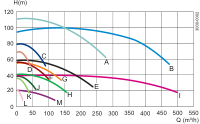 </div>

<div bbox="[56.69292068481445, 225.56455993652344, 228.60189819335938, 236.1935577392578]" page_index="3" className="text_wrapper">Frequency: 50 Hz Speed (synchr): 3000 rpm
 </div>

<div bbox="[56.69292068481445, 247.62249755859375, 91.87391662597656, 258.17950439453125]" page_index="3" className="text_wrapper">Options 
 </div>

<div bbox="[60.69792175292969, 261.0684814453125, 332.4530029296875, 427.6974182128906]" page_index="3" className="text_wrapper">• Impeller with reduced diameter.
• Flushed shaft seal.
• Double mechanical shaft seal.
• Rotating seal face of Silicon Carbide.
• Product wetted elastomers NBR, FPM or FEP
.
• ½” vertical drain connection.
• Product wetted surface finish mechanically polished to Ra ≤ 0.8 μm.
• Surface finish measurement with certificate (Ra ≤ 0.8 μm).
• Inducer (LKH-10 to -50).
• Adjustable pads.
• Motor for other voltage and/or frequency.
• Half speed motor.
• Motor with increased safety/flame proof motor.
• ATEX approved execution (LKHex).
 </div>

<div bbox="[56.69292449951172, 439.1263427734375, 95.38392639160156, 449.683349609375]" page_index="3" className="text_wrapper">Ordering 
 </div>

<div bbox="[56.69292449951172, 452.57232666015625, 215.24594116210938, 559.2013549804688]" page_index="3" className="text_wrapper">Please state the following when ordering:
• Pump size.
• Connections.
• Impeller diameter.
• Motor size.
• Voltage and frequency.
• Flow, pressure and temperature.
• Density and viscosity of the product.
• Options.
 </div>

<h3 bbox="[87.03938293457031, 570.4405517578125, 282.1094055175781, 582.320556640625]" page_index="3" className="text_wrapper"> Note! For further details, see also ESE00698.
 </h3>

<div bbox="[56.690956115722656, 731.5240478515625, 546.35107421875, 762.6100463867188]" page_index="3" className="text_wrapper">This document and its contents are subject to copyrights and other intellectual property rights owned by Alfa Laval Corporate AB. No part of this document may be copied, re-produced or
transmitted in any form or by any means, or for any purpose, without Alfa Laval Corporate AB’s prior express written permission. Information and services provided in this document are made
as a benefit and service to the user, and no representations or warranties are made about the accuracy or suitability of this information and these services for any purpose. All rights are
reserved.
 </div>

<div bbox="[56.69514465332031, 772.3922729492188, 552.7582397460938, 780.6592407226562]" page_index="3" className="text_wrapper">200006086-1-EN-GB
© Alfa Laval Corporate AB
 </div>

<div bbox="[56.69293212890625, 793.7728271484375, 275.30987548828125, 821.997802734375]" page_index="3" className="text_wrapper">How to contact Alfa Laval
Up-to-date Alfa Laval contact details for all countries are always available
on our website at www.alfalaval.com
 </div>

In [6]:
from IPython.display import display, Markdown, Latex

markdown_str = doc_transformer.transform_to(Format.MARKDOWN.value)

Markdown(markdown_str)